In [36]:
#!/usr/bin/env python3

import pandas as pd

# In Anaconda navigator I needed to install geopandas and then update it to fix fiona / gdal error
# https://stackoverflow.com/questions/42749254/error-in-importing-geopandas#43762549
# https://github.com/GenericMappingTools/gmt-python/issues/104
import geopandas as gpd

import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/39215202/matplotlib-geopandas-plot-multiple-layers-control-figsize
# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
# https://erdatadoc.com/2016/07/14/jupyter-notebook-matplotlib-figure-display-options-and-pandas-set_option-optimization-tips/
# plt.rcParams['figure.figsize'] = [10, 20]

# display plots inside jupyter
%matplotlib inline

import malaria_scraper


In [37]:
# Create country malaria dataframe

In [38]:
df_malaria = malaria_scraper.get_dataframe_all_countries()
df_malaria.head()

,country,areas_with_malaria,estimated_risk
0,Afghanistan,AprilâDecember in all areas at altitudes bel...,Moderate
1,Albania,None,None
2,Algeria,None,None
3,American Samoa,None,None
4,Andorra,None,None


# Create map dataframe

In [39]:
def get_map_df():
    """
    use geopandas basemap
    
    alternatively could use
    http://ramiro.org/notebook/geopandas-choropleth/
    http://www.naturalearthdata.com/downloads/10m-cultural-vectors/
    :return: geopandas dataframe with country name, areas, geometry
    
    """
    
    # http://geopandas.org/mapping.html
    df_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    column_names_lower = [column_name.lower() for column_name in df_map.columns]
    df_map.columns = column_names_lower
    
    df_map.rename({'name': 'country'}, axis='columns', inplace=True)
    
    return df_map

In [40]:
df_map = get_map_df()
print(df_map.dtypes)
df_map.head()

pop_est       float64
continent      object
country        object
iso_a3         object
gdp_md_est    float64
geometry       object
dtype: object


,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


# Merge malaria into GeoDataFrame

In [41]:
df_map = pd.merge(left=df_map, right=df_malaria, on='country', sort=True)
df_map.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,areas_with_malaria,estimated_risk
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AprilâDecember in all areas at altitudes bel...,Moderate
1,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",None,None
2,34178188.0,Africa,Algeria,DZA,232900.0,"POLYGON ((11.99950564947161 23.47166840259645,...",None,None
3,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,All,High
4,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,None,None


# Plot chloropleth map of estimated malaria risk for US travelers
http://geopandas.org/mapping.html

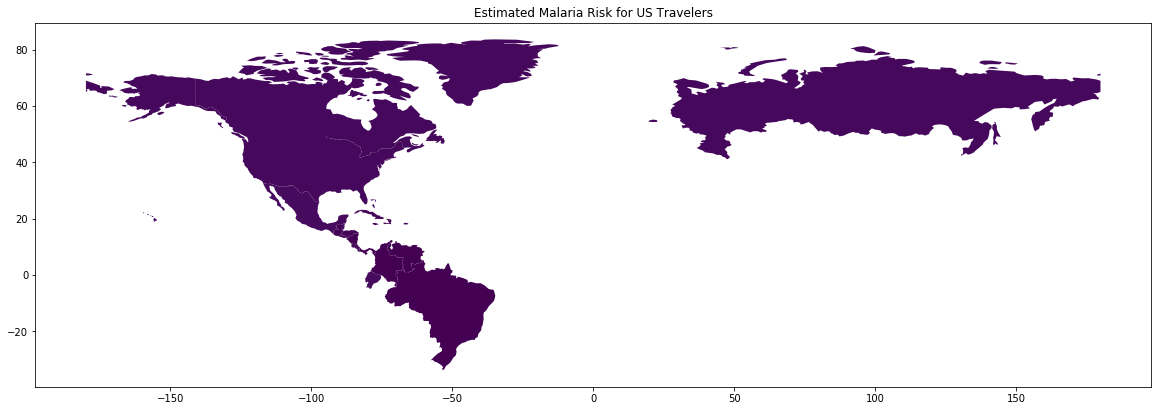

In [42]:
# cx coordinate based indexing slice by longitude, latitude
df_map = df_map.cx[-179:-65, 0:80]

cmap = 'viridis'
num_colors = 40
vmin=0
vmax=100

# https://stackoverflow.com/questions/39215202/matplotlib-geopandas-plot-multiple-layers-control-figsize
figsize = (20, 20)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_title('Estimated Malaria Risk for US Travelers')

df_map.plot(column='estimated_risk', cmap=cmap, ax=ax, k=num_colors, legend=False, vmin=vmin, vmax=vmax)